# Predict housing prices in Melbourne

### Obtain the data

In [1]:
from arcgis import GIS

In [2]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

In [3]:
housing_data = gis.content.search('title: Melbourne Housing Market', 'Feature layer', outside_org=True)[0]

<Item title:"Melbourne Housing Market" type:Feature Layer Collection owner:demo_deldev>
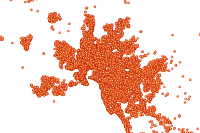

In [4]:
housing_data

In [5]:
housing_lyr = housing_data.layers[0]

In [6]:
import pandas as pd
sdf = pd.DataFrame.spatial.from_layer(housing_lyr)

In [7]:
sdf.head()

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,GlobalID,...,Postcode,Price,Propertycount,Regionname,Rooms,SHAPE,SellerG,Suburb,Type,YearBuilt
0,124 Yarra St,2.0,4.0,210,0.0,Yarra City Council,07-05-2016,2.5,12,df7288eb-60b3-4933-ab13-0ebfa4b32782,...,3067,1876000.0,4019,Northern Metropolitan,3,"{""x"": 16141248.241381114, ""y"": -4551549.044634...",Nelson,Abbotsford,h,1910.0
1,78 Yarra St,1.0,2.0,105,1.0,Yarra City Council,16-07-2016,2.5,28,a55a44ec-743c-4db1-b8cd-0622c88d0cbd,...,3067,1176500.0,4019,Northern Metropolitan,3,"{""x"": 16140936.54680689, ""y"": -4551506.7784160...",LITTLE,Abbotsford,h,1890.0
2,52a William St,2.0,2.0,135,1.0,Yarra City Council,18-06-2016,2.5,36,fa53131f-4ace-4234-a607-08268ea36042,...,3067,1100000.0,4019,Northern Metropolitan,2,"{""x"": 16141070.130195843, ""y"": -4552323.955738...",Biggin,Abbotsford,h,2013.0
3,13 Etzel St,1.0,3.0,105,1.0,Moonee Valley City Council,10-12-2016,13.5,68,911c80a2-9deb-4d25-9c5b-06139dfc3412,...,3042,805000.0,3464,Western Metropolitan,3,"{""x"": 16127778.582995124, ""y"": -4540185.611807...",Nelson,Airport West,h,1950.0
4,145a Victory Rd,1.0,2.0,None,1.0,Moonee Valley City Council,13-08-2016,13.5,70,2847f0b3-c9e1-4068-a1bb-0c64ee186931,...,3042,440000.0,3464,Western Metropolitan,2,"{""x"": 16127823.110791445, ""y"": -4539622.690798...",Barry,Airport West,u,NaN


In [8]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'GlobalID', 'Landsize', 'Lattitude',
       'Longtitude', 'Method', 'Postcode', 'Price', 'Propertycount',
       'Regionname', 'Rooms', 'SHAPE', 'SellerG', 'Suburb', 'Type',
       'YearBuilt'],
      dtype='object')

In [9]:
sdf.shape

(26881, 24)

In [10]:
sdf = sdf[sdf.Price.notnull()]

In [11]:
sdf.shape

(20993, 24)

In [12]:
sdf.describe()

,Bathroom,Bedroom2,Car,Distance,FID,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,YearBuilt
count,20778.000000,20784.000000,20401.000000,20993.000000,20993.000000,17960.000000,20993.000000,20993.000000,20993.000000,2.099300e+04,20993.000000,20993.000000,12076.000000
mean,1.591298,3.046237,1.715259,11.359020,13443.965941,593.748719,-37.806963,144.996711,3114.630972,1.089746e+06,7516.751489,3.059163,1966.592001
std,0.700844,0.954948,0.994518,6.891418,7730.711620,3759.538783,0.091619,0.120680,114.810599,6.530283e+05,4411.397778,0.949881,36.752058
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-38.190430,144.423790,3000.000000,8.500000e+04,83.000000,1.000000,1196.000000
25%,1.000000,2.000000,1.000000,6.400000,6777.000000,219.000000,-37.860900,144.925300,3046.000000,6.570000e+05,4380.000000,2.000000,1950.000000
50%,1.000000,3.000000,2.000000,10.400000,13481.000000,512.000000,-37.800460,145.003200,3087.000000,9.100000e+05,6567.000000,3.000000,1970.000000
75%,2.000000,4.000000,2.000000,14.200000,20082.000000,664.000000,-37.748970,145.068770,3152.000000,1.335000e+06,10331.000000,4.000000,2000.000000
max,9.000000,20.000000,18.000000,48.100000,26881.000000,433014.000000,-37.397800,145.526350,3978.000000,1.120000e+07,21650.000000,16.000000,2019.000000


In [13]:
sdf.head(1)

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,GlobalID,...,Postcode,Price,Propertycount,Regionname,Rooms,SHAPE,SellerG,Suburb,Type,YearBuilt
0,124 Yarra St,2.0,4.0,210,0.0,Yarra City Council,07-05-2016,2.5,12,df7288eb-60b3-4933-ab13-0ebfa4b32782,...,3067,1876000.0,4019,Northern Metropolitan,3,"{""x"": 16141248.241381114, ""y"": -4551549.044634...",Nelson,Abbotsford,h,1910.0


# Exploratory data analysis and visualization

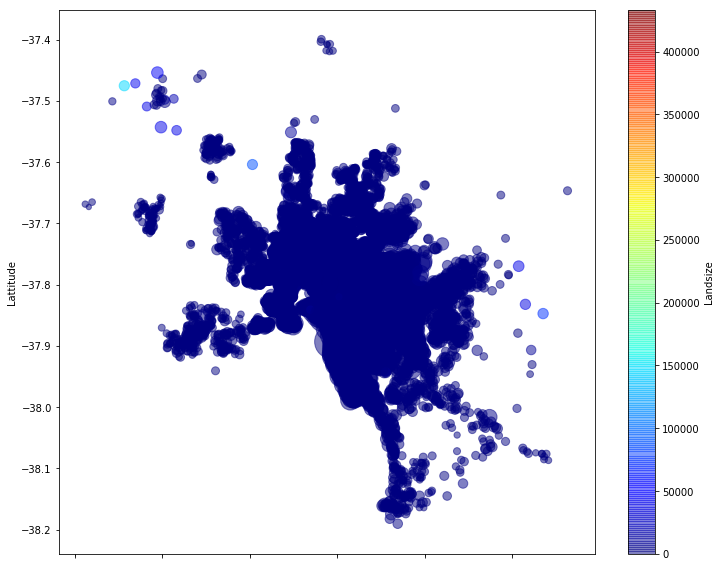

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
sdf.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.5, s=sdf["Price"]/10000,
         c="Landsize", cmap=plt.get_cmap("jet"), rot=45, figsize=(12,10))

In [15]:
import seaborn as sns

C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


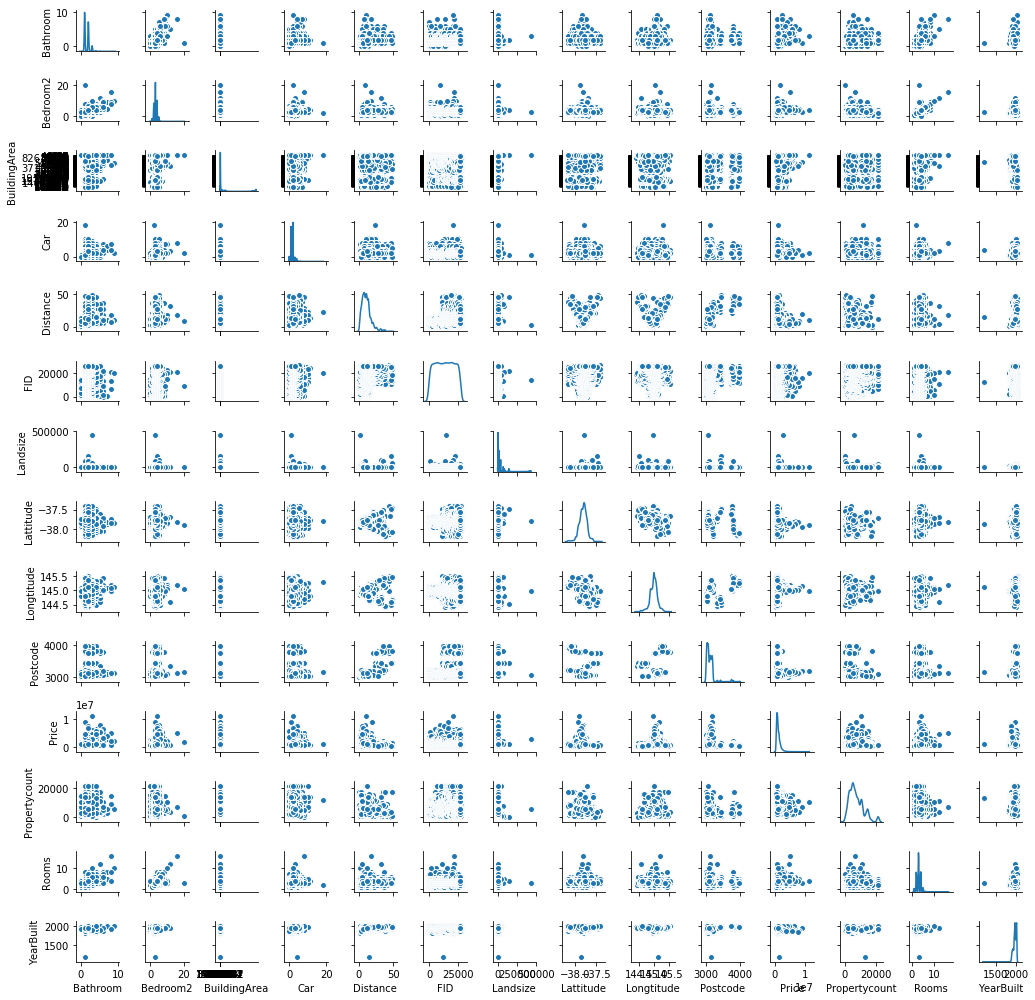

In [16]:
sns.pairplot(sdf, diag_kind="kde", size= 1)

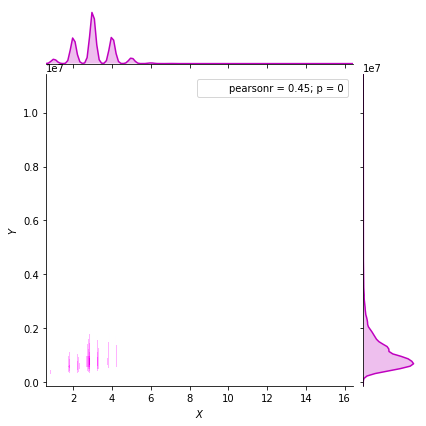

In [17]:
g = sns.jointplot(x=sdf.Rooms, y=sdf.Price, data=sdf, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [18]:
sdf['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Western Victoria',
       'Eastern Victoria', 'Northern Victoria'], dtype=object)

[Text(0,0,'Northern Metropolitan'),
 Text(0,0,'Western Metropolitan'),
 Text(0,0,'Southern Metropolitan'),
 Text(0,0,'Eastern Metropolitan'),
 Text(0,0,'South-Eastern Metropolitan'),
 Text(0,0,'Eastern Victoria'),
 Text(0,0,'Northern Victoria'),
 Text(0,0,'Western Victoria')]

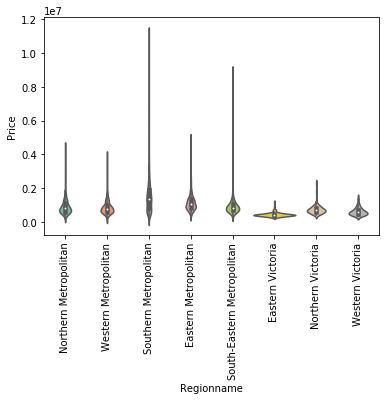

In [19]:
g = sns.violinplot(x=sdf.Regionname, y=sdf.Price, data=sdf, bw='silverman', width=1,  palette="Set2", size=8);


g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)

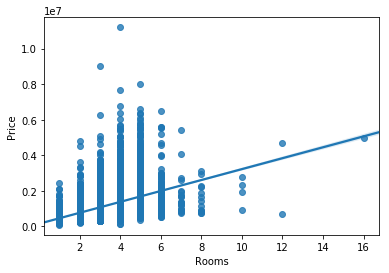

In [20]:
sns.regplot(x=sdf.Rooms, y=sdf.Price, data=sdf);

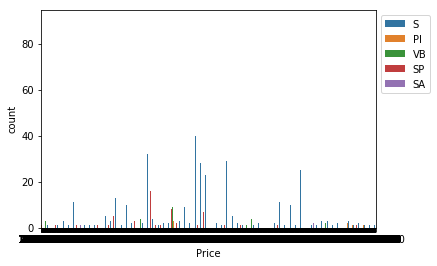

In [21]:
sns.countplot(x='Price', hue='Method', data=sdf)
plt.legend(bbox_to_anchor=(1,1))

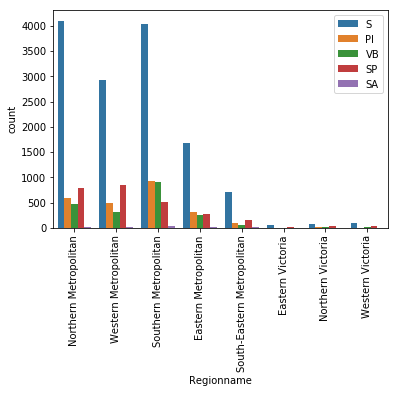

In [22]:


g = sns.countplot(x='Regionname', hue='Method', data=sdf)

g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)
plt.legend(bbox_to_anchor=(1,1))

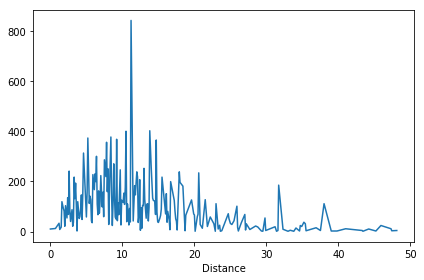

In [23]:
sdf.groupby(by='Distance').count()['Lattitude'].plot()
plt.tight_layout()

# Predictive analysis

## Dataset with continuous values

In [24]:
cols = ['Bathroom', 'Bedroom2', 'BuildingArea', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'YearBuilt', 'Price']

In [25]:
df = sdf[cols]

In [26]:
df.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt,Price
0,2.0,4.0,210,2.5,245.0,-37.8024,144.9993,3,1910.0,1876000.0
1,1.0,2.0,105,2.5,138.0,-37.8021,144.9965,3,1890.0,1176500.0
2,2.0,2.0,135,2.5,124.0,-37.8079,144.9977,2,2013.0,1100000.0
3,1.0,3.0,105,13.5,0.0,-37.7217,144.8783,3,1950.0,805000.0
4,1.0,2.0,None,13.5,192.0,-37.7177,144.8787,2,NaN,440000.0


## Deleting rows with nan price 

In [27]:
import numpy as np

In [28]:
sf = df[np.isfinite(df['Price'])]

In [29]:
sf.shape

(20993, 10)

## Dropping the target value

In [30]:
y = sf.Price

In [31]:
sf.drop('Price', inplace=True, axis=1)

## Imputing NaN values

In [32]:
import pandas as pd

In [33]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [34]:
imputer.fit(sf)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [35]:
sf.median().values

array([ 1.000000e+00,  3.000000e+00,  1.330000e+02,  1.040000e+01,
        5.120000e+02, -3.780046e+01,  1.450032e+02,  3.000000e+00,
        1.970000e+03])

In [36]:
transformed = imputer.transform(sf)

In [37]:
x = pd.DataFrame(transformed, columns=sf.columns,
                          index = list(sf.index.values))

In [38]:
x.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt
0,2.0,4.0,210.0,2.5,245.0,-37.8024,144.9993,3.0,1910.0
1,1.0,2.0,105.0,2.5,138.0,-37.8021,144.9965,3.0,1890.0
2,2.0,2.0,135.0,2.5,124.0,-37.8079,144.9977,2.0,2013.0
3,1.0,3.0,105.0,13.5,0.0,-37.7217,144.8783,3.0,1950.0
4,1.0,2.0,133.0,13.5,192.0,-37.7177,144.8787,2.0,1970.0


## Feature scaling

In [39]:
x_scaled = (x-x.min())/(x.max()-x.min())

## Splitting train and test data

In [40]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x_scaled, y, random_state=0)

In [41]:
len(train_X)

15744

In [42]:
len(train_y)

15744

In [43]:
len(test_X)

5249

In [44]:
len(test_y)

5249

## Training and testing model

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(train_X, train_y)
predicted = model.predict(test_X)
r2_score(test_y, predicted)

0.6255980569301052

In [46]:
# mean absolute error for decisiontreeclassifier
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predicted)

229146.51553443965

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(train_X, train_y)
Predicted = forest.predict(test_X)
r2_score(test_y, Predicted)

0.7656362298086867

In [48]:
# mean absolute error for RandonForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, Predicted)

188470.26104019815

2. Run prediction with categorical columns by making dummies.

In [49]:
columns = ['Bathroom', 'Bedroom2', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'Price', 'Regionname', 'Method']

In [50]:
df = sdf[columns]

In [51]:
len(df)

20993

In [52]:
df.isnull().sum()

Bathroom       215
Bedroom2       209
Distance         0
Landsize      3033
Lattitude        0
Longtitude       0
Rooms            0
Price            0
Regionname       0
Method           0
dtype: int64

In [53]:
df = df[np.isfinite(df['Price'])]

In [54]:
df.shape

(20993, 10)

In [55]:
corr_matrix = df.corr()

corr_matrix['Price'].sort_values()

Distance     -0.235394
Lattitude    -0.215607
Landsize      0.032734
Longtitude    0.197874
Bathroom      0.430088
Bedroom2      0.430289
Rooms         0.446781
Price         1.000000
Name: Price, dtype: float64

In [56]:
Y = df.Price

In [57]:
df.drop('Price', inplace=True, axis=1)

## Replacing nan values with median

In [58]:
df_num = df.drop(['Method','Regionname'], axis=1)

In [59]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [60]:
imputer.fit(df_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [61]:
transformed = imputer.transform(df_num)

In [62]:
X_transfomed = pd.DataFrame(transformed, columns=df_num.columns,
                          index = list(df_num.index.values))

In [63]:
X = pd.concat([X_transfomed, df[['Method','Regionname']]], axis=1)

In [64]:
X.isnull().sum()

Bathroom      0
Bedroom2      0
Distance      0
Landsize      0
Lattitude     0
Longtitude    0
Rooms         0
Method        0
Regionname    0
dtype: int64

## Create dummies for categorical data

In [65]:
X_dummy = pd.get_dummies(X)

## Feature scaling

In [66]:
X_scaled = (X_dummy-X_dummy.min())/(X_dummy.max()-X_dummy.min())

## Splitting train and test data

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

## Training and testing

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
r2_score(y_test, predicted)

0.6361464998708568

In [69]:
# mean_absolute_error for DecissiontreeRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

626909.3627230583

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(x_train, y_train)
Predicted = forest.predict(x_test)
r2_score(y_test, Predicted)

0.7480180719108527

In [71]:
# mean_absolute_error for RandomForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

191405.14902521114